In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings


warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
df  = pd.read_csv("../dataset/ETHEREUM_FRAUD_DETECTION.csv")

In [3]:
df.sample(5)

Unnamed: 0  Index                                     Address  FLAG  \
2055        2055   2056  0x3586781523bd02a377dfbc5ec2d5f9e2414979b6     0   
650          650    651  0x0fca2bc1bfc443d234e59b6e4736fbed72b00932     0   
5082        5082   2150  0x86aaef7ba1ecb84e4a3b7bd4ffa37084119f3ca1     0   
9095        9095   1434  0xa62cb4bd9e69e9170a2d973aa3aece5a1215d41c     1   
7980        7980    319  0x2276f412d2ae5dc2cdc293b0df70a8273f6f6771     1   

      Avg min between sent tnx  Avg min between received tnx  \
2055                    162.23                          0.03   
650                       0.00                          0.00   
5082                      9.76                       2015.87   
9095                   3200.23                        203.95   
7980                   2393.43                         76.14   

      Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
2055                                   324.53         2             2   
650                                    525.72         1             1   
5082                                794037.42       391           392   
9095                                  8032.08         2             8   
7980                                 28873.43        12             2   

      Number of Created Contracts  Unique Received From Addresses  \
2055                            0                               2   
650                             0                               1   
5082                            0                               3   
9095                            0                               8   
7980                            0                               2   

      Unique Sent To Addresses  min value received  max value received   \
2055                         2           48.960302            52.039698   
650                          1            0.300000             0.300000   
5082                         1            0.020000             3.830360   
9095                         2            0.447900             1.000000   
7980                        12            0.570000             0.685292   

      avg val received  min val sent  max val sent  avg val sent  \
2055         50.500000     48.998974     52.000000     50.499487   
650           0.300000      0.299380      0.299380      0.299380   
5082          0.224179      0.192931      3.828602      0.223392   
9095          0.560671      0.100000      4.383649      2.241825   
7980          0.627646      0.021090      0.650999      0.104410   

      min value sent to contract  max val sent to contract  \
2055                         0.0                       0.0   
650                          0.0                       0.0   
5082                         0.0                       0.0   
9095                         0.0                       0.0   
7980                         0.0                       0.0   

      avg value sent to contract  \
2055                         0.0   
650                          0.0   
5082                         0.0   
9095                         0.0   
7980                         0.0   

      total transactions (including tnx to create contract  total Ether sent  \
2055                                                  4           100.998974   
650                                                   2             0.299380   
5082                                                783            87.346383   
9095                                                 10             4.483649   
7980                                                 14             1.252925   

      total ether received  total ether sent contracts  total ether balance  \
2055            101.000000                         0.0             0.001026   
650               0.300000                         0.0             0.000620   
5082             87.878174                         0.0             0.531791   
9095              4.485371                         0.0   

In [4]:
df.drop(['Unnamed: 0','Index','Address'],axis =1,inplace = True)

In [5]:
df.head()

FLAG  Avg min between sent tnx  Avg min between received tnx  \
0     0                    844.26                       1093.71   
1     0                  12709.07                       2958.44   
2     0                 246194.54                       2434.02   
3     0                  10219.60                      15785.09   
4     0                     36.61                      10707.77   

   Time Diff between first and last (Mins)  Sent tnx  Received Tnx  \
0                                704785.63       721            89   
1                               1218216.73        94             8   
2                                516729.30         2            10   
3                                397555.90        25             9   
4                                382472.42      4598            20   

   Number of Created Contracts  Unique Received From Addresses  \
0                            0                              40   
1                            0                               5   
2                            0                              10   
3                            0                               7   
4                            1                               7   

   Unique Sent To Addresses  min value received  max value received   \
0                       118            0.000000            45.806785   
1                        14            0.000000             2.613269   
2                         2            0.113119             1.165453   
3                        13            0.000000           500.000000   
4                        19            0.000000            12.802411   

   avg val received  min val sent  max val sent  avg val sent  \
0          6.589513          0.00     31.220000      1.200681   
1          0.385685          0.00      1.800000      0.032844   
2          0.358906          0.05      3.538616      1.794308   
3         99.488840          0.00    450.000000     70.001834   
4          2.671095          0.00      9.000000      0.022688   

   min value sent to contract  max val sent to contract  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

   avg value sent to contract  \
0                         0.0   
1                         0.0   
2                         0.0   
3                         0.0   
4                         0.0   

   total transactions (including tnx to create contract  total Ether sent  \
0                                                810           865.691093   
1                                                102             3.087297   
2                                                 12             3.588616   
3                                                 34          1750.045862   
4                                               4619           104.318883   

   total ether received  total ether sent contracts  total ether balance  \
0            586.466675                         0.0          -279.224419   
1              3.085478                         0.0            -0.001819   
2              3.589057                         0.0             0.000441   
3            895.399559                         0.0          -854.646303   
4             53.421897                         0.0           -50.896986   

    Total ERC20 tnxs   ERC20 total Ether received   ERC20 total ether sent  \
0              265.0                 3.558854e+07             3.560317e+07   
1                8.0                 4.034283e+02             2.260809e+00   
2                8.0                 5.215121e+02             0.000000e+00   
3               14.0                 1.711105e+04             1.141223e+04   
4               42.0                 1.628297e+05             1.235399e+05   

    ERC20 total

In [6]:
df.dtypes

FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                                            float64
min value sent to contract              

In [7]:
#shape of the data 
df.shape

(9841, 48)

In [8]:

df.describe ()


FLAG  Avg min between sent tnx  Avg min between received tnx  \
count  9841.000000               9841.000000                   9841.000000   
mean      0.221421               5086.878721                   8004.851184   
std       0.415224              21486.549974                  23081.714801   
min       0.000000                  0.000000                      0.000000   
25%       0.000000                  0.000000                      0.000000   
50%       0.000000                 17.340000                    509.770000   
75%       0.000000                565.470000                   5480.390000   
max       1.000000             430287.670000                 482175.490000   

       Time Diff between first and last (Mins)      Sent tnx  Received Tnx  \
count                             9.841000e+03   9841.000000   9841.000000   
mean                              2.183333e+05    115.931714    163.700945   
std                               3.229379e+05    757.226361    940.836550   
min                               0.000000e+00      0.000000      0.000000   
25%                               3.169300e+02      1.000000      1.000000   
50%                               4.663703e+04      3.000000      4.000000   
75%                               3.040710e+05     11.000000     27.000000   
max                               1.954861e+06  10000.000000  10000.000000   

       Number of Created Contracts  Unique Received From Addresses  \
count                  9841.000000                     9841.000000   
mean                      3.729702                       30.360939   
std                     141.445583                      298.621112   
min                       0.000000                        0.000000   
25%                       0.000000                        1.000000   
50%                       0.000000                        2.000000   
75%                       0.000000                        5.000000   
max                    9995.000000                     9999.000000   

       Unique Sent To Addresses  min value received  max value received   \
count               9841.000000         9841.000000          9841.000000   
mean                  25.840159           43.845153           523.152481   
std                  263.820410          325.929139         13008.821539   
min                    0.000000            0.000000             0.000000   
25%                    1.000000            0.001000             1.000000   
50%                    2.000000            0.095856             6.000000   
75%                    3.000000            2.000000            67.067040   
max                 9287.000000        10000.000000        800000.000000   

       avg val received  min val sent   max val sent  avg val sent  \
count       9841.000000   9841.000000    9841.000000   9841.000000   
mean         100.711721      4.800090     314.617297     44.755731   
std         2885.002236    138.609682    6629.212643    239.080215   
min            0.000000      0.000000       0.000000      0.000000   
25%            0.426905      0.000000       0.164577      0.086184   
50%            1.729730      0.049126       4.999380      1.606000   
75%           22.000000      0.998800      61.520653     21.999380   
max       283618.831600  12000.000000  520000.000000  12000.000000   

       min value sent to contract  max val sent to contract  \
count                 9841.000000               9841.000000   
mean                     0.000003                  0.000008   
std                      0.000225                  0.000516   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      0.000000                  0.000000   
75%                      0.000000                  0.000000   
max                      0.020000                  0.046029   

       avg value sent to contract  \
count                 9841.000000   
mean               

In [9]:
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

In [10]:
#checking the missing values 
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

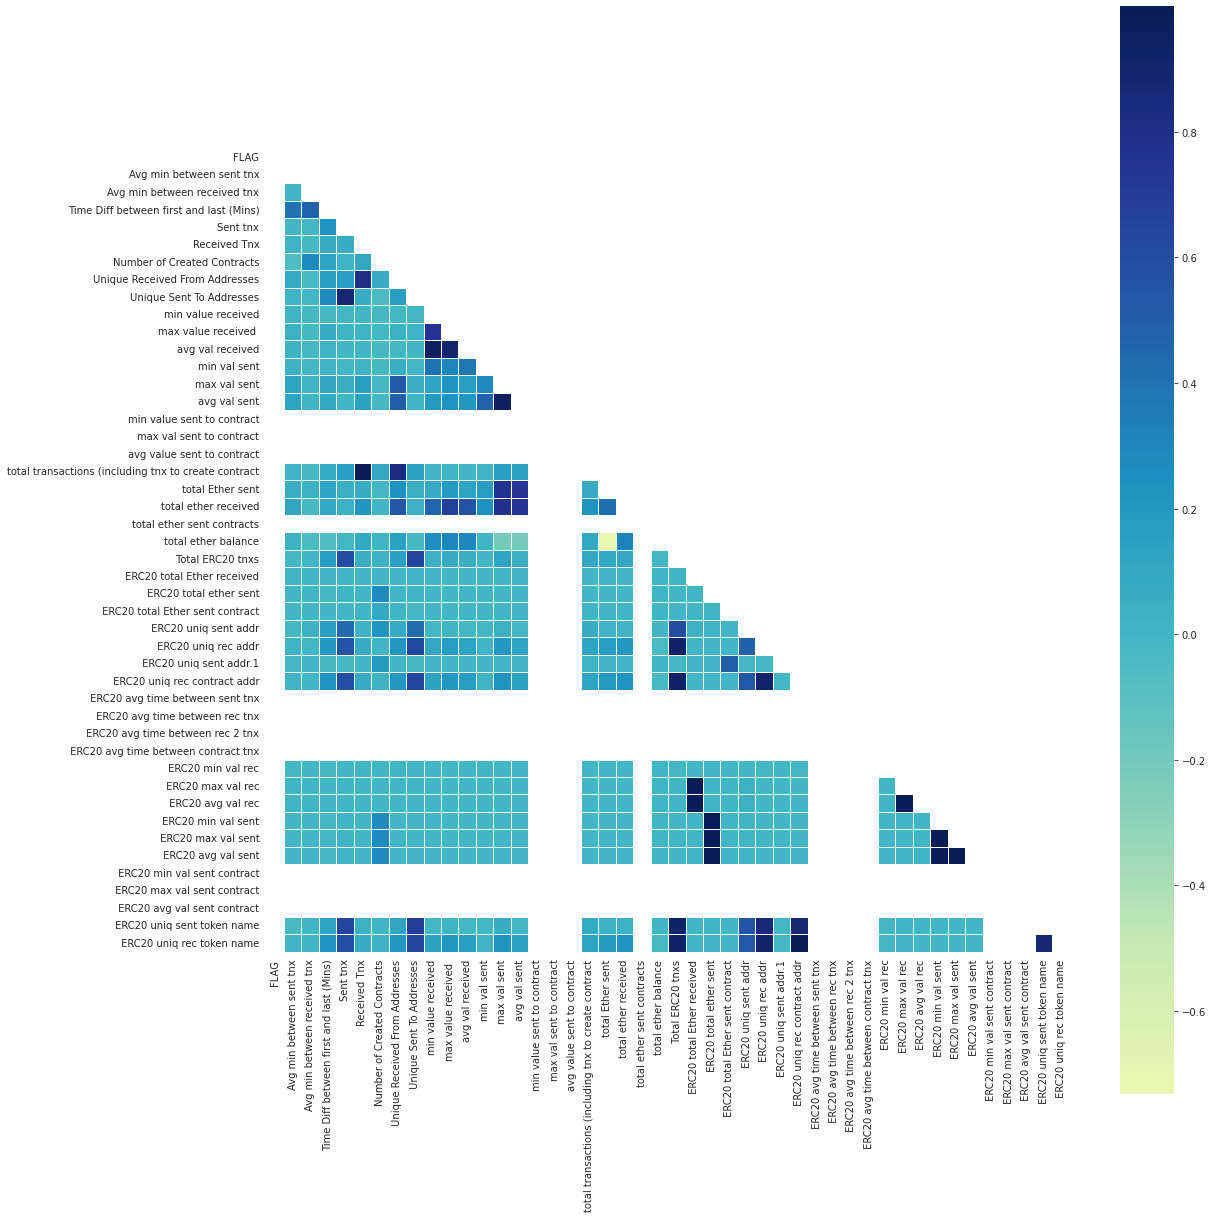

In [11]:
# Fraudulant Correlation
df_fraud = df[df['FLAG']==1]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)



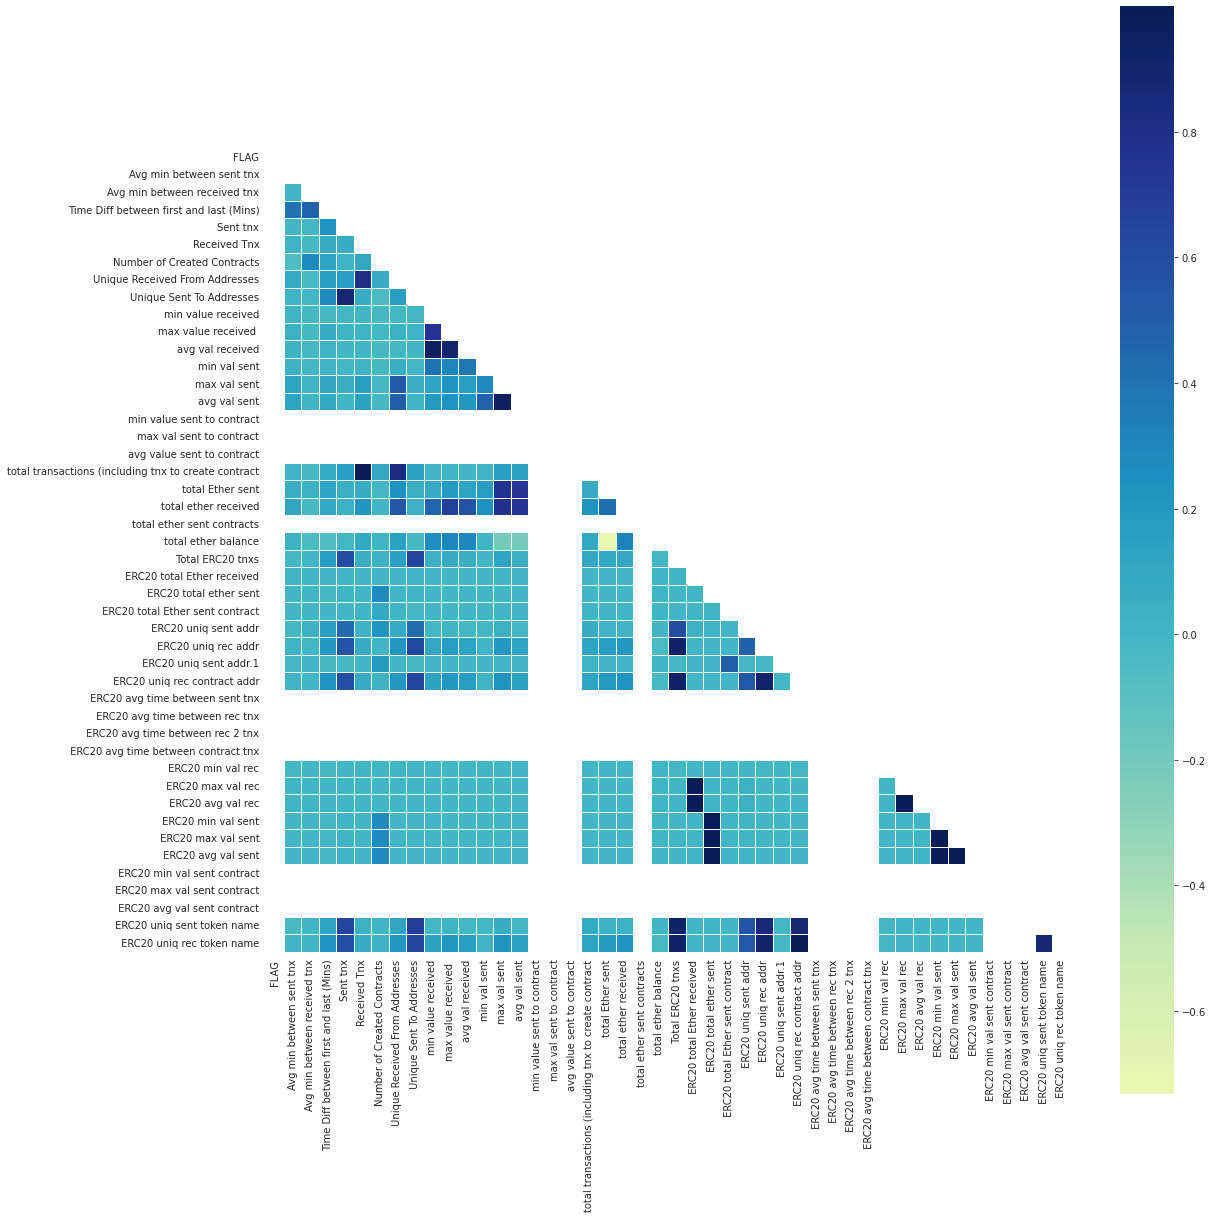

In [12]:
# Non-Fraudulant Correlation
df_not_fraud = df[df['FLAG']==0]
corr = df_fraud.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18,20))
    sns.heatmap(corr,  mask=mask, annot=False, cmap='YlGnBu',center=0, linewidths=0.8, square=True)

array([[<AxesSubplot:title={'center':'FLAG'}>,
        <AxesSubplot:title={'center':'Avg min between sent tnx'}>,
        <AxesSubplot:title={'center':'Avg min between received tnx'}>,
        <AxesSubplot:title={'center':'Time Diff between first and last (Mins)'}>,
        <AxesSubplot:title={'center':'Sent tnx'}>,
        <AxesSubplot:title={'center':'Received Tnx'}>,
        <AxesSubplot:title={'center':'Number of Created Contracts'}>],
       [<AxesSubplot:title={'center':'Unique Received From Addresses'}>,
        <AxesSubplot:title={'center':'Unique Sent To Addresses'}>,
        <AxesSubplot:title={'center':'min value received'}>,
        <AxesSubplot:title={'center':'max value received '}>,
        <AxesSubplot:title={'center':'avg val received'}>,
        <AxesSubplot:title={'center':'min val sent'}>,
        <AxesSubplot:title={'center':'max val sent'}>],
       [<AxesSubplot:title={'center':'avg val sent'}>,
        <AxesSubplot:title={'center':'min value sent to contract'}>,

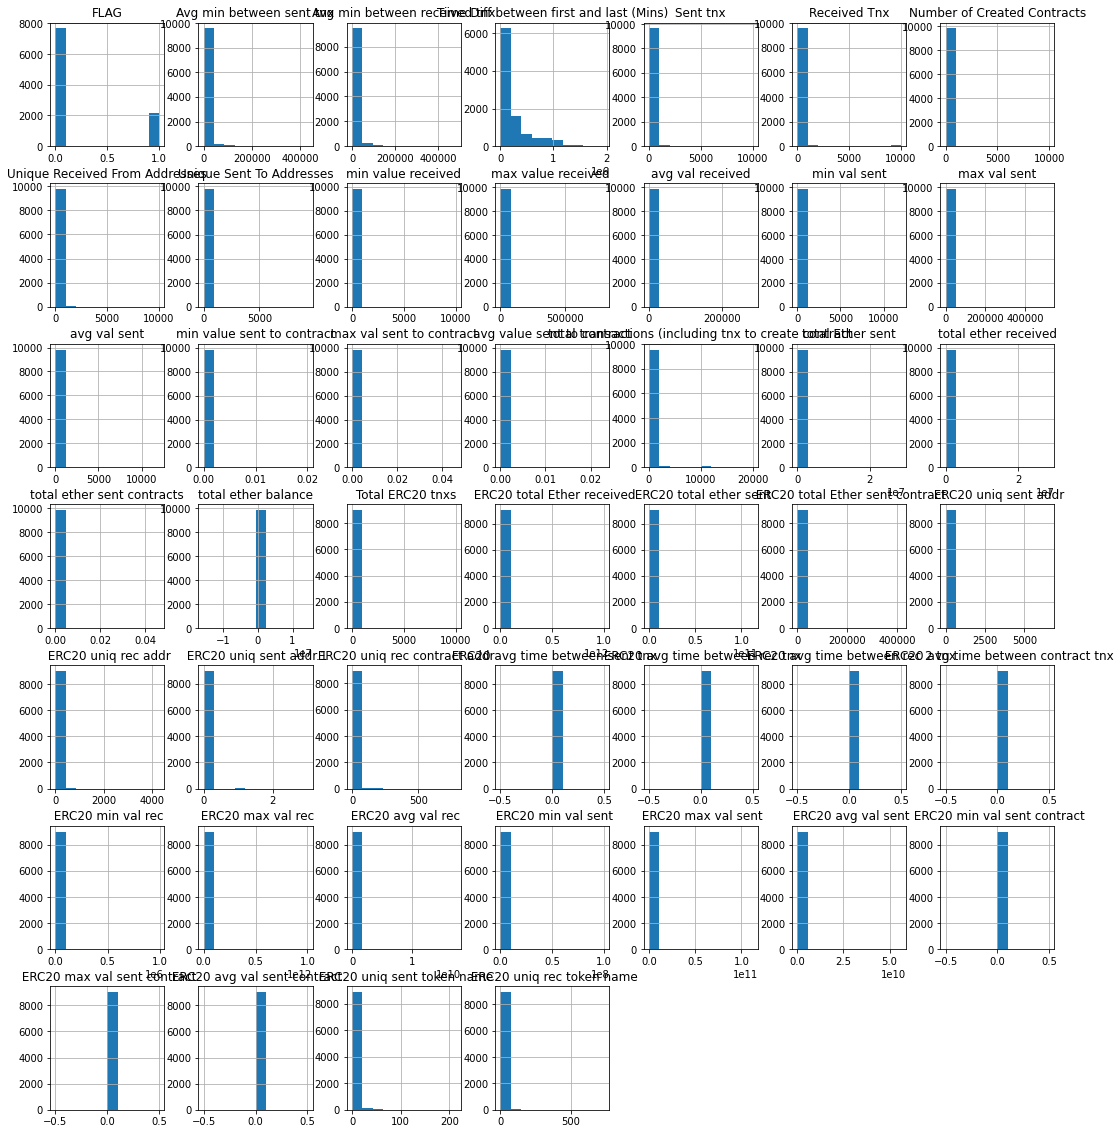

In [15]:
df.hist(figsize=(18,20))


In [23]:
df.select_dtypes(include = ['float64','int64']).skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

From the above graph and data we can see that our data is highly skewed

### Checking Imbalance 

<AxesSubplot:xlabel='FLAG', ylabel='count'>

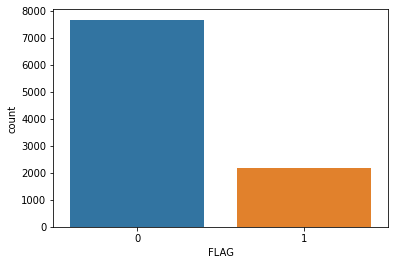

In [24]:
sns.countplot(x="FLAG", data=df)

In [25]:
df["FLAG"].value_counts()

0    7662
1    2179
Name: FLAG, dtype: int64

In [34]:
print(f'Percentage of non-fraudulent instances : {len(df.loc[df["FLAG"]==0])/len(df["FLAG"])*100}')
print(f'Percentage of fraudulent instances : {len(df.loc[df["FLAG"]==1])/len(df["FLAG"])*100}')

Percentage of non-fraudulent instances : 77.85794126613149
Percentage of fraudulent instances : 22.14205873386851


Our data is highly imblance with 22% fraudlent instances.

##### Checking unique values of categorical columns

In [38]:
for i in df.select_dtypes(include = ['object']).columns:
    print(f' {i} : {len(df[i].unique())}')

  ERC20 most sent token type : 306
  ERC20_most_rec_token_type : 468


In [39]:
#let have a look at the values 
df[df.select_dtypes(include = ['object']).columns].sample(10)

ERC20 most sent token type  ERC20_most_rec_token_type
6552                    MobileGo                   MobileGo
9344                                  Blockwell say NOTSAFU
4392                           0                          0
9827                                  Blockwell say NOTSAFU
818                         None                   DATAcoin
2581                           0                          0
169                            0                          0
7484                           0                          0
1829                        None                    OmiseGO
6710                       Golem                      Golem

In [40]:
#let have a look at the values 
df[df.select_dtypes(include = ['object']).columns].head(10)

ERC20 most sent token type  ERC20_most_rec_token_type
0                   Cofoundit                  Numeraire
1              Livepeer Token             Livepeer Token
2                        None                      XENON
3                      Raiden                      XENON
4               StatusNetwork                        EOS
5                           0                          0
6                           0                          0
7                        None                      XENON
8                           0                          0
9                        None                   AICRYPTO

In [41]:
#let have a look at the values 
df[df.select_dtypes(include = ['object']).columns].tail(10)

ERC20 most sent token type         ERC20_most_rec_token_type
9831                         NaN                               NaN
9832                                         Blockwell say NOTSAFU
9833                         NaN                               NaN
9834                         NaN                               NaN
9835                         NaN                               NaN
9836                                                    GSENetwork
9837                                         Blockwell say NOTSAFU
9838                              Free BOB Tokens - BobsRepair.com
9839                         NaN                               NaN
9840                                                    INS Promo1

In [48]:

df[' ERC20 most sent token type'].value_counts()

0                                                         4399
None                                                      1856
                                                          1191
EOS                                                        138
OmiseGO                                                    137
                                                          ... 
Arcona Distribution Contract                                 1
HeroCoin                                                     1
Cindicator                                                   1
UnlimitedIP Token                                            1
eosDAC Community Owned EOS Block Producer ERC20 Tokens       1
Name:  ERC20 most sent token type, Length: 305, dtype: int64

In [49]:
#let have a look at the values 
df[' ERC20_most_rec_token_type'].value_counts()

0                        4399
OmiseGO                   873
Blockwell say NOTSAFU     779
DATAcoin                  358
Livepeer Token            207
                         ... 
BCDN                        1
Egretia                     1
UG Coin                     1
Yun Planet                  1
INS Promo1                  1
Name:  ERC20_most_rec_token_type, Length: 467, dtype: int64

In [50]:
#it seems irrelvant for columns for creating our model and hence we will drop it 
df.drop([' ERC20_most_rec_token_type',' ERC20 most sent token type'],axis =1,inplace = True)